# Pair Programming Correlación y covarianza

##### 1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza indica si dos variables varían en la misma dirección, mientras que la correlación indica además si existe relación entre ambas, de manera que una da información sobre la otra.

##### 2. Calculad la covarianza y la correlación de vuestro dataset y haced una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [1]:
 #Realizamos las importaciones para el tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Y para la realización de los gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8) # para estandarizar el tamaño de todas las figuras del jupyter. 

In [2]:
df = pd.read_csv("datos/wellness_1.csv", index_col=0)
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


En primer lugar vamos a evaluar la correlación y la covarianza entre las variables de manera visual.
 en forma de scatterplot y la distribución de cada variable en forma de histograma:

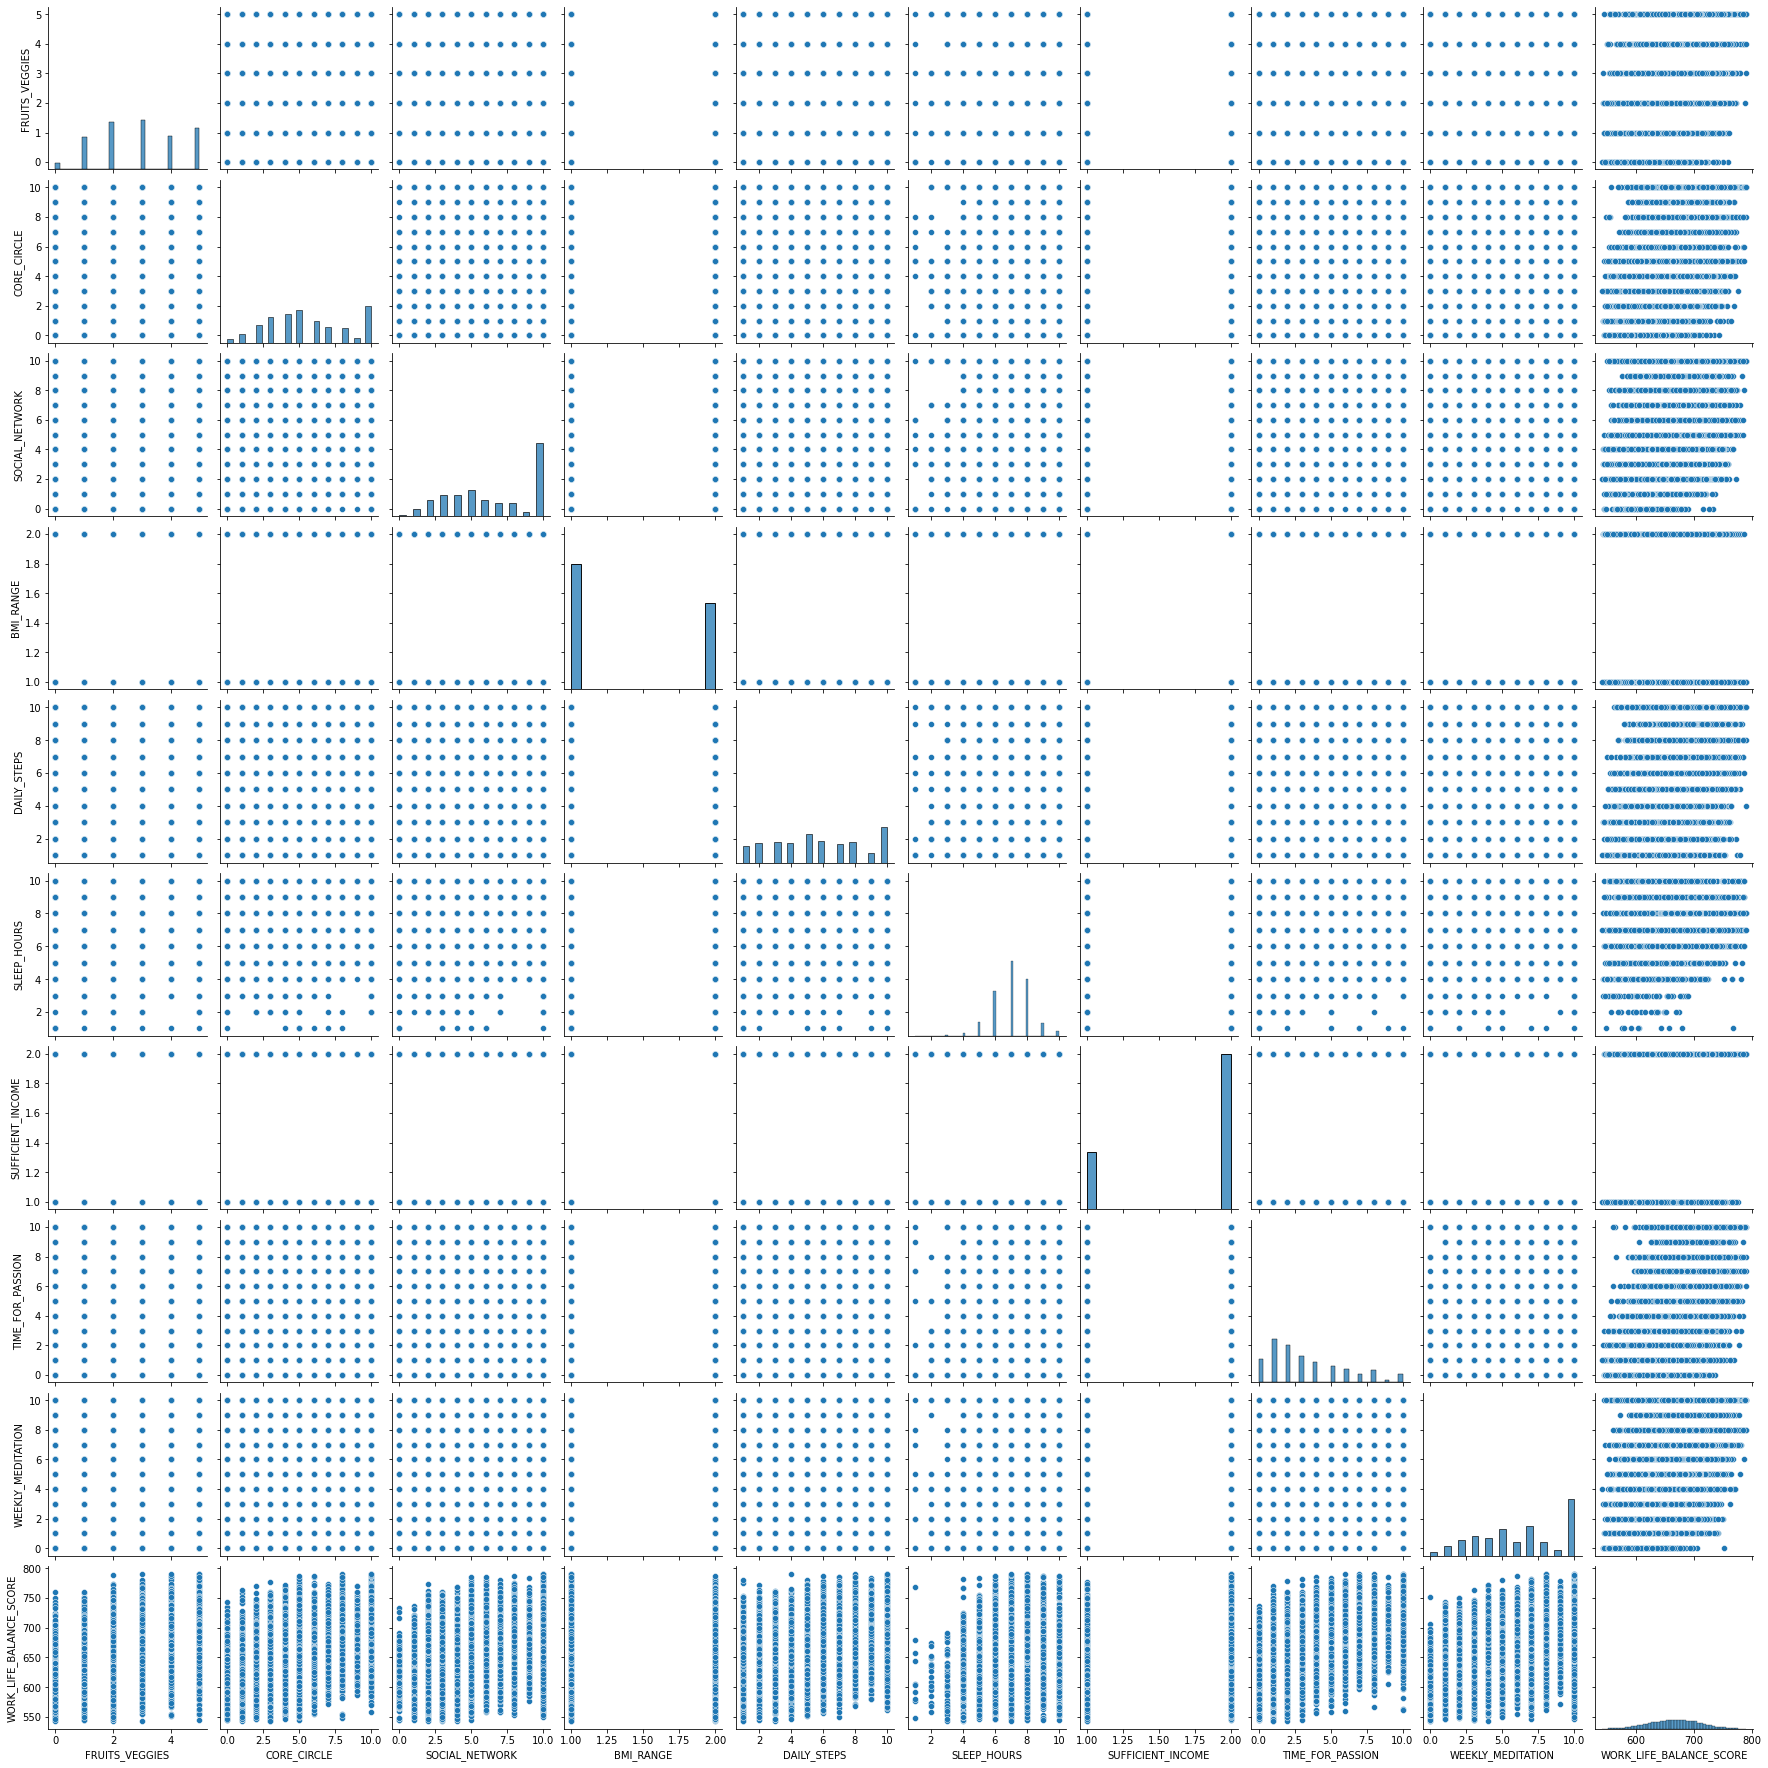

In [8]:
sns.pairplot(df)

Calculamos la covarianza analíticamente:

In [9]:
df.cov()

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,2.070221,0.615221,0.421951,-0.065844,1.009670,0.166137,0.091423,0.618994,0.807278,28.281835
CORE_CIRCLE,0.615221,8.009552,2.625651,-0.028763,1.143975,0.201734,0.147512,1.698226,0.809018,62.532339
SOCIAL_NETWORK,0.421951,2.625651,9.456812,0.046804,1.819517,-0.140143,0.151602,1.643867,-0.170589,54.260873
BMI_RANGE,-0.065844,-0.028763,0.046804,0.241538,-0.179774,-0.056946,-0.000354,-0.006537,-0.112854,-5.338470
DAILY_STEPS,1.009670,1.143975,1.819517,-0.179774,8.301850,0.015624,0.116778,1.066609,1.221498,52.745375
SLEEP_HOURS,0.166137,0.201734,-0.140143,-0.056946,0.015624,1.412573,0.019868,0.170271,0.558788,9.658993
SUFFICIENT_INCOME,0.091423,0.147512,0.151602,-0.000354,0.116778,0.019868,0.196156,0.083586,0.089284,7.711224
TIME_FOR_PASSION,0.618994,1.698226,1.643867,-0.006537,1.066609,0.170271,0.083586,7.389588,1.505529,61.576279
WEEKLY_MEDITATION,0.807278,0.809018,-0.170589,-0.112854,1.221498,0.558788,0.089284,1.505529,9.042492,53.937315
WORK_LIFE_BALANCE_SCORE,28.281835,62.532339,54.260873,-5.338470,52.745375,9.658993,7.711224,61.576279,53.937315,1946.728406


La covarianza nos da información sobre la dirección de la relación de las variables, así que si nos fijamos en los valores obtenidos podemos decir por ejemplo que la covarianza entre el índice de masa corporal y el resto de variables es casi siempre negativa: el índice de masa corporal disminuye al aumentar la mayoría de las variables (por ejemplo, al aumentar la ingesta de frutas/verduras o los pasos diarios, disminuye el indice de masa corporal). El resto de variables por lo general, presenta n entre ellas covarianza positiva (al aumentar una, aumenta la otra.)

Para conocer ahora la "intensidad" de esa relación debemos calcular la correlación entre todas las variables con el método corr().

La correlación de Pearson se usa para relaciones lineales:

In [4]:
df.corr()

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.000000,0.151084,0.095363,-0.093114,0.243548,0.097152,0.143465,0.158259,0.186582,0.445499
CORE_CIRCLE,0.151084,1.000000,0.301690,-0.020679,0.140289,0.059975,0.117686,0.220740,0.095063,0.500781
SOCIAL_NETWORK,0.095363,0.301690,1.000000,0.030968,0.205351,-0.038344,0.111310,0.196646,-0.018447,0.399909
BMI_RANGE,-0.093114,-0.020679,0.030968,1.000000,-0.126954,-0.097491,-0.001626,-0.004893,-0.076363,-0.246191
DAILY_STEPS,0.243548,0.140289,0.205351,-0.126954,1.000000,0.004562,0.091511,0.136178,0.140981,0.414901
SLEEP_HOURS,0.097152,0.059975,-0.038344,-0.097491,0.004562,1.000000,0.037744,0.052702,0.156350,0.184193
SUFFICIENT_INCOME,0.143465,0.117686,0.111310,-0.001626,0.091511,0.037744,1.000000,0.069426,0.067039,0.394612
TIME_FOR_PASSION,0.158259,0.220740,0.196646,-0.004893,0.136178,0.052702,0.069426,1.000000,0.184177,0.513394
WEEKLY_MEDITATION,0.186582,0.095063,-0.018447,-0.076363,0.140981,0.156350,0.067039,0.184177,1.000000,0.406530
WORK_LIFE_BALANCE_SCORE,0.445499,0.500781,0.399909,-0.246191,0.414901,0.184193,0.394612,0.513394,0.406530,1.000000


En este caso no sólo debemos fijarnos en el signo, si no también en el valor. Un valor de correlación de 0 indica que las variables no están corelacionadas, y cuanto más se acerca a 1 o -1 más fuerte será su correlación.
De igual modo el signo indica que, si es negativo, al aumentar una variable disminuye la otra.

Para visualizar esta información lo mejor es realizar un heatmap:

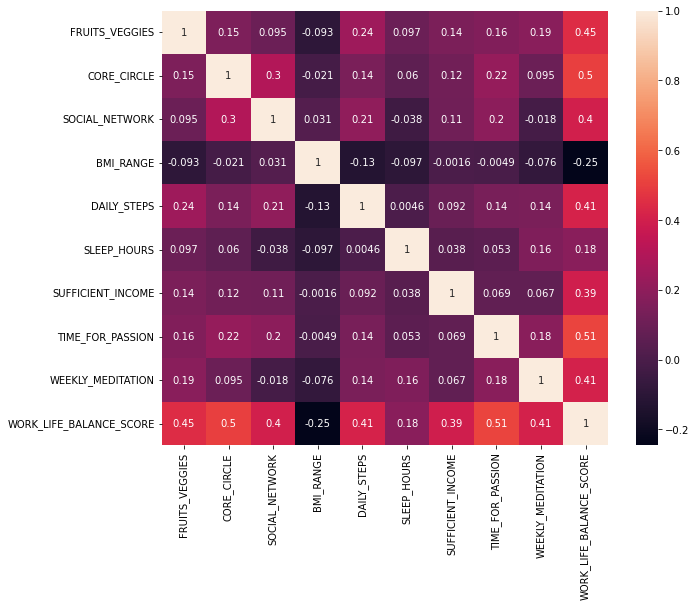

In [5]:
sns.heatmap(df.corr(),annot = True);
# annot = True, para sacar el valor de la correlación.

Como tenemos la información duplicada por encima de la diagonal, eliminaremos uno de los lados

In [9]:
# creamos un dataframe de unos que tenga la misma forma que nuestra matriz de correlación:

mask =np.triu(np.ones_like(df.corr(), dtype=np.bool))

/tmp/ipykernel_9400/306310231.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =np.triu(np.ones_like(df.corr(), dtype=np.bool))


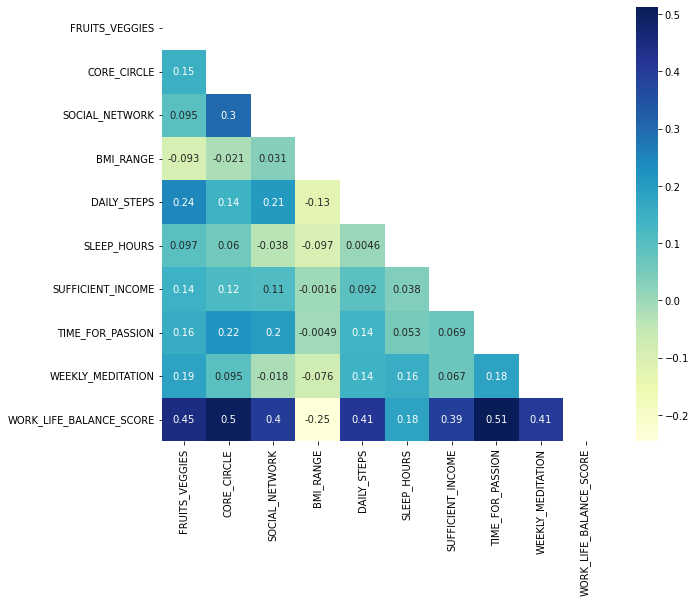

In [11]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True);    

Podemos comprobar en este heatmap, como las correlaciones positivas más fuertes se dan entre aquellas que presentan un color azul más intenso. La variable respuesta "work life balance score" está positivamente correlacionada y con una intensidad media con las variables que reflejan la meditación semanal, el tiempo dedicado a las aficiones, las interacciones con un círculo cercano y la ingesta de frutas y verduras.